In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors

import geopandas as gpd

import contextily as ctx
aglom = gpd.read_file('aglomerados_eph.json')

aglo_43 = ["02", "03", "04", "05", "06", "13", "14", "30", "34", "36", "38"]


gdf_filtrado = aglom[aglom["eph_codagl"].isin(aglo_43)]


c:\Users\belem\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
import pandas as pd


# Crear DataFrame con tus datos
data = {
    'AGLOMERADO': ["02", "03", "04", "05", "06", "13", "14", "30", "34", "36", "38"],
    'TASA_DESOCUPACION': [7.72, 7.57, 9.28, 4.18, 3.54, 8.36, 5.63, 7.33, 10.13, 6.93, 6.71] #2017
    # 'TASA_DESOCUPACION': [6.01,	8.64,	9.37,	8.19,	5.4,	12.17,	7.22,	9.91,	9.89,	6.4,	7.64]#2021
    # 'TASA_DESOCUPACION': [8.96,6.47,6.16,6.9,	4.49,	8.13,	4.5,	7.21,	7.34,5.03,	7.59] #2024
}
df_tasas = pd.DataFrame(data)


# 2. Normalización de claves (usando .loc para evitar el warning)
gdf_filtrado = gdf_filtrado.copy()  
gdf_filtrado.loc[:, 'codigo_merge'] = gdf_filtrado['eph_codagl'].astype(str).str.zfill(2)  # Aseguramos 2 dígitos

df_tasas.loc[:, 'codigo_merge'] = df_tasas['AGLOMERADO'].astype(str).str.zfill(2)


gdf_completo = gdf_filtrado.merge(
    df_tasas,
    on='codigo_merge',
    how='left'
)



c:\Users\belem\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


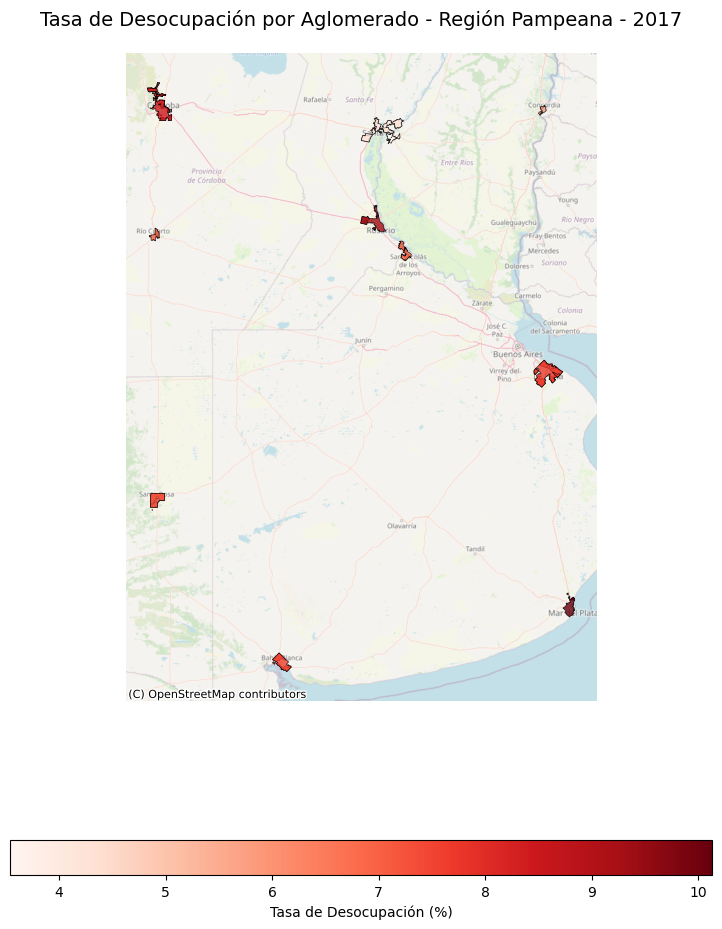

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

# Configurar el mapa
fig, ax = plt.subplots(figsize=(12, 10))

# convertir a CRS adecuado 
gdf_completo = gdf_completo.to_crs(epsg=3857)

# crear mapa
gdf_completo.plot(column='TASA_DESOCUPACION', 
                 ax=ax,
                 cmap='Reds',                 
                 legend=True,                 
                 legend_kwds={
                     'label': "Tasa de Desocupación (%)",
                     'shrink': 0.6,            
                     'orientation': "horizontal" 
                 },
                 alpha=0.8,                    # Transparencia
                 edgecolor='black',            
                 linewidth=0.5)               


# 4. Añadir mapa base
ctx.add_basemap(ax, 
               crs=gdf_completo.crs.to_string(), 
               source=ctx.providers.OpenStreetMap.Mapnik, 
               alpha=0.7)

plt.title("Tasa de Desocupación por Aglomerado - Región Pampeana - 2017", 
          fontsize=14, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
print(gdf_completo[['eph_codagl','eph_aglome', 'TASA_DESOCUPACION']].value_counts())

eph_codagl  eph_aglome                         TASA_DESOCUPACION
02          Gran La Plata                      7.72                 4
03          Bahia Blanca - Cerri               7.57                 3
13          Gran Córdoba                       8.36                 3
38          San Nicolas - Villa Constitución   6.71                 3
04          Gran Rosario                       9.28                 2
05          Gran Santa Fe                      4.18                 2
06          Gran Paraná                        3.54                 2
14          Concordia                          5.63                 2
30          Santa Rosa - Toay                  7.33                 2
34          Mar del Plata - Batán              10.13                2
36          Rio Cuarto                         6.93                 2
38          San Nicolas - Villa Constitiución  6.71                 2
Name: count, dtype: int64
